# Capstone II: Pre_processing and Training Data Development

**The different steps we will take are:**

* Standardize the magnitude of numeric features
* Split into testing and training datasets
* Apply scaler to the testing set

We will start by loading the necessary packages 

In [122]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score, GridSearchCV

We need to know what is our curent working directory.

In [28]:
os.getcwd()

'C:\\Users\\meteu\\Desktop\\SPRINGBOARD\\PROJECT 2\\data'

In [29]:
path="C:/Users/meteu/Desktop/SPRINGBOARD/PROJECT 2/data"
print(os.chdir(path))

None


In [30]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 603D-12C6

 Directory of C:\Users\meteu\Desktop\SPRINGBOARD\PROJECT 2\data

07/03/2020  10:34 AM    <DIR>          .
07/03/2020  10:34 AM    <DIR>          ..
07/03/2020  09:05 AM            89,556 BMI.PNG
06/30/2020  07:50 PM           125,900 chart.PNG
06/27/2020  11:24 AM         3,420,416 clean_data.csv
07/06/2020  08:49 PM         4,040,522 ready_data.csv
               4 File(s)      7,676,394 bytes
               2 Dir(s)  347,228,979,200 bytes free


Let us now load the data we created at the end of EDA.

In [31]:
df=pd.read_csv('ready_data.csv')
df.head()

,Unnamed: 0,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [32]:
df=df.drop(columns=['Unnamed: 0'])
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


Let us check the data type of each columns

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66478 entries, 0 to 66477
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          66478 non-null  int64  
 1   gender       66478 non-null  int64  
 2   height       66478 non-null  int64  
 3   weight       66478 non-null  float64
 4   ap_hi        66478 non-null  int64  
 5   ap_lo        66478 non-null  int64  
 6   cholesterol  66478 non-null  int64  
 7   gluc         66478 non-null  int64  
 8   smoke        66478 non-null  int64  
 9   alco         66478 non-null  int64  
 10  active       66478 non-null  int64  
 11  cardio       66478 non-null  int64  
 12  BMI          66478 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 6.6 MB


# Split into training and testing datasets

We will be using sklearn preprocessing to standardize the scale of features of our dataframe.
We will set `cardio` as our `y` variable (or response variable) and our `X` varibale will be all our dataframe exept `cardio`.

In [34]:
X=df.drop(columns=['cardio'])
y=df['cardio']

Using sklearn model selection import train_test_split, and create a 80/20 split with the y=`cardio`.

In [35]:
from sklearn.model_selection import train_test_split

Let us flatenned our variable y by calling the `ravel()` function on `y`.

In [36]:
y=y.ravel()

We will call `train_test_split()` function with the first two parameters set to `X` and `y`.

But before doing that let us display the proportion among the classes in cardio.

In [78]:
df['cardio'].value_counts()

0    33728
1    32750
Name: cardio, dtype: int64

In [86]:
a=df['cardio'].value_counts()[0]
b=df['cardio'].value_counts()[1]

In [87]:
print("The proportion of patient not having cardiovascular disease in our dataset is ", a/(a+b))

The proportion of patient not having cardiovascular desease in our dataset is  0.5073558169620025


In [88]:
print("The proportion of patient having cardiovascular disease in our dataset is ", b/(a+b))

The proportion of patient having cardiovascular desease in our dataset is  0.4926441830379975


We can see that the our response variable is a little bit unbalance. Therefore we will introduce in the `train_test_plit` function the parameter `stratify`. What that parameter will do is when splitting the data it will keep the same class proportion as in the original dataset. 

In [37]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

Let us check to see if the proportion is still the same in the `y_train` and `y_test`

In [93]:
a=np. count_nonzero(y_train== 0)
b=np. count_nonzero(y_train== 1)
print("The proportion of patient not having cardiovascular disease in the training dataset is ", a/(a+b))
print("The proportion of patient not having cardiovascular disease in the training dataset is ", b/(a+b))

The proportion of patient not having cardiovascular desease in the training dataset is  0.5073521116167125
The proportion of patient not having cardiovascular desease in the training dataset is  0.4926478883832876


In [94]:
a=np. count_nonzero(y_test== 0)
b=np. count_nonzero(y_test== 1)
print("The proportion of patient not having cardiovascular disease in the testing dataset is ", a/(a+b))
print("The proportion of patient not having cardiovascular disease in the testing dataset is ", b/(a+b))

The proportion of patient not having cardiovascular desease in the testing dataset is  0.5073706377858003
The proportion of patient not having cardiovascular desease in the testing dataset is  0.4926293622141998


# Standardize the magnitude of our features

We use StandardScaler() method of the preprocessing package and then call the fit() method with parameter X.

In [38]:
scaler=preprocessing.StandardScaler().fit(X)

We declare 2 variables called X_scaled_train and X_scaled_test and assign them the result of calling the transform() method with respectively parameter X_train and X_test.

In [39]:
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [40]:
X_scaled_train

array([[ 0.67067983, -0.73274923,  0.45501257, ..., -0.2362407 ,
         0.49551603,  1.69760911],
       [ 0.65202169, -0.73274923,  0.45501257, ..., -0.2362407 ,
         0.49551603, -0.91664924],
       [ 1.28234248,  1.36472336,  0.84022541, ..., -0.2362407 ,
         0.49551603, -0.50874539],
       ...,
       [-1.48676955, -0.73274923,  0.45501257, ..., -0.2362407 ,
        -2.0180982 , -1.29011472],
       [ 0.90917959,  1.36472336,  2.25267253, ..., -0.2362407 ,
         0.49551603,  0.01988727],
       [ 0.12675435, -0.73274923, -0.18700885, ..., -0.2362407 ,
         0.49551603, -0.61422499]])

In [41]:
X_scaled_test

array([[-1.17809894, -0.73274923,  0.71182113, ..., -0.2362407 ,
         0.49551603, -0.66548401],
       [-1.20973666,  1.36472336,  1.35384255, ...,  4.23297084,
         0.49551603,  0.76782946],
       [ 1.55572486,  1.36472336,  1.99586396, ..., -0.2362407 ,
         0.49551603, -0.24109168],
       ...,
       [ 0.15433596, -0.73274923, -1.85626453, ..., -0.2362407 ,
         0.49551603, -0.80586444],
       [-0.82278296, -0.73274923, -0.95743455, ..., -0.2362407 ,
         0.49551603, -1.49538512],
       [ 0.99273563, -0.73274923, -0.70062598, ..., -0.2362407 ,
         0.49551603,  1.73324057]])

# Capstone II: Modeling

**The different steps we will take are:**

* Fit Models with Training Data Set
* Review Model Outcomes — Iterate over additional models as needed.
* Identify the Final Model

## Fit Models with Training Dataset

Let us define certain term and use those term to avaluate how well our model perform.

* `Precision` is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all patient that have cardiovascular disease, how many actually have it?


* `Accuracy` is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.


* `Recall` calculates the percentage of actual positives a model correctly identified (True Positive).


* `An ROC` curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate and False Positive Rate.


* `AUC` stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1). AUC provides an aggregate measure of performance across all possible classification thresholds.


* `F1 Score` is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution.


### Logistic Regression

We will use sklearn to fit the model on our training dataset and we will use predict() method to predict our model.

In [110]:
cls = LogisticRegression()
cls.fit(X_scaled_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Let us plot the coeficient of our model

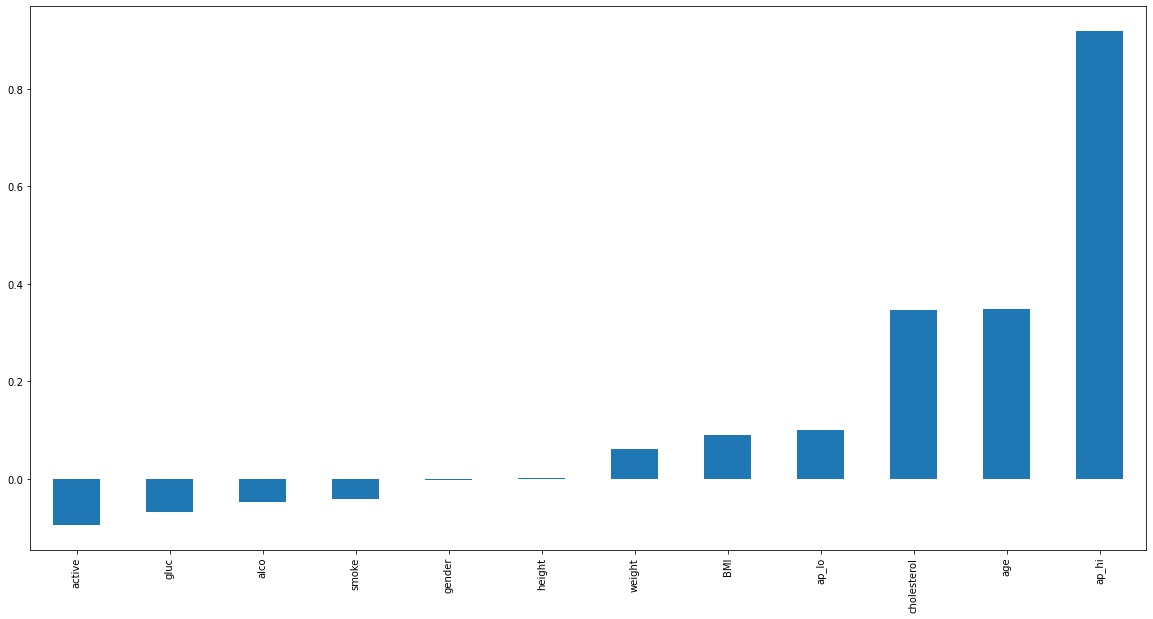

In [148]:
X_scaled_train_pd=pd.DataFrame(data=X_scaled_train, index=None, columns=['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'BMI'])
coefs = pd.Series(cls.coef_[0], index=X_scaled_train_pd.columns)
coefs.sort_values(inplace=True)
plt.figure(figsize=(20,10))
coefs.plot(kind="bar")

Let us find the `Accuracy`, `F1 score`, `AUC`, `Precision` on the training set

In [116]:
y_pred_train = cls.predict(X_scaled_train)
print(" [Train] F1 score: {:6f}".format(metrics.f1_score(y_train, y_pred_train)))
print(" [Train] Accuracy: {:6f}".format(metrics.accuracy_score(y_train, y_pred_train)))
print(" [Train]  AUC: {:6f}".format(metrics.roc_auc_score(y_train, y_pred_train)))
print(" [Train] Precision: {:6f}".format(metrics.precision_score(y_train, y_pred_train)))

 [Train] F1 score: 0.702882
 [Train] Accuracy: 0.724380
 [Train]  AUC: 0.723473
 [Train] Precision: 0.749460


Let us draw the confusion matrix for the training data.

Text(0.5, 15.0, 'Predicted value')

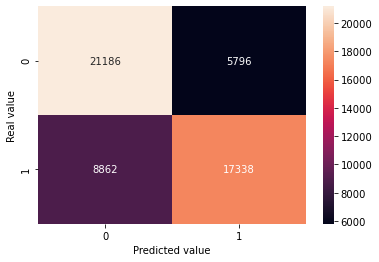

In [112]:
cm = metrics.confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_predict_training))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     26982
           1       0.49      1.00      0.66     26200

    accuracy                           0.49     53182
   macro avg       0.25      0.50      0.33     53182
weighted avg       0.24      0.49      0.33     53182



C:\Users\meteu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Let us now find the `Accuracy`, `F1 score`, `AUC`, `Precision` on the test set

In [113]:
y_pred_test = cls.predict(X_scaled_test)
print(" [Test] F1 score: {:6f}".format(metrics.f1_score(y_test, y_pred_test)))
print(" [Test] Accuracy: {:6f}".format(metrics.accuracy_score(y_test, y_pred_test)))
print(" [Test]  AUC: {:6f}".format(metrics.roc_auc_score(y_test, y_pred_test)))
print(" [Test] Precision: {:6f}".format(metrics.precision_score(y_test, y_pred_test)))

 [Test] F1 score: 0.708189
 [Test] Accuracy: 0.727963
 [Test]  AUC: 0.727122
 [Test] Precision: 0.750898


Let us draw the confusion matrix for testing data.

Text(0.5, 15.0, 'Predicted value')

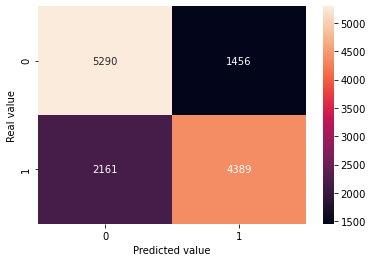

In [114]:
cm = metrics.confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

These performance metrics are global. Let us go in detail and see how well the model perform per class. We will use the `classification_report` function for that. 

In [169]:
#print(classification_report(y_test, y_predict_test))

print("[Training Classification Report]")
print(classification_report(y_train, y_pred_train))

print("\n")

print("[Test Classification Report]")
print(classification_report(y_test, y_pred_test))

[Training Classification Report]
              precision    recall  f1-score   support

           0       0.71      0.79      0.74     26982
           1       0.75      0.66      0.70     26200

    accuracy                           0.72     53182
   macro avg       0.73      0.72      0.72     53182
weighted avg       0.73      0.72      0.72     53182



[Test Classification Report]
              precision    recall  f1-score   support

           0       0.71      0.78      0.75      6746
           1       0.75      0.67      0.71      6550

    accuracy                           0.73     13296
   macro avg       0.73      0.73      0.73     13296
weighted avg       0.73      0.73      0.73     13296



<div class="span5 alert alert-info">
<h3>In the training dataset:</h3>

<ul>
<li> We can observe that:
    
   <ol>
   <li>The precision of patient not having cardiovascular disease is less than those having cardiovascular disease.
   <li>The recall of patient not having cardiovascular disease is higher than those haivng cardiovascular disease.
   <li>The f1-score of patient not having cardiovascular disease is higher than those haivng cardiovascular disease.
   </ol>




<div class="span5 alert alert-info">
<h3>In the testing dataset:</h3>

<ul>
<li>We can observe that:
    
   <ol>
   <li>The precision of patient not having cardiovascular disease is less than those having cardiovascular disease.       
   <li>The recall of patient not having cardiovascular disease is higher than those haivng cardiovascular disease.
   <li>The f1-score of patient not having cardiovascular disease is higher than those haivng cardiovascular disease.

When comparing the performance metrics in the testing dataset and in the training dataset, we can see that they are either equals ore one is slighly higher than the other.
Since the performance metrics in training and testing are closed to each other respectively, we can say that our model is fitting well.

Let use another method called Model Tuning and see if thr performance metrics will improve.

### Tuning the Model

The idea here is that if we tune some hyperparameters of our model, we might have better performance metrics

We will build `cv_score` function to perform 10-fold cross-validation and apply  a scoring function to each test fold.

In [170]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    number_of_fold = 10
    for train, test in KFold(number_of_fold).split(x): # split data into train/test groups, 10 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / number_of_fold # average

In [171]:
score=cv_score(cls, X_scaled_train, y_train)
print(score)

0.7247000064553896


<div class="span5 alert alert-info">

<ul>
<li> Let us  take a list of possible parameters to search over ie `Cs=[0.001, 0.1, 1, 10, 100]`
<li> For each parameters C in Cs:
  <ol>
  <li> We will build a logistic regression model with that value of C
  <li> We will find the average score for this model using the `cv_score` function **only on the training set** `(X_scaled_train, y_train)`
  </ol>
<li> Pick the C with the highest average score
</ul>
Our goal is to find the best model parameters based *only* on the training set, without showing the model test set at all (which is why the test set is also called a *hold-out* set).
</div>

In [172]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]

# your turn
max_score = 0

for C in Cs:
        clf = LogisticRegression(C=C)
        score = cv_score(cls, X_scaled_train, y_train)

        if score > max_score:
            max_score = score
            thebest_C =C
print(max_score, thebest_C)

0.7247000064553896 0.001


Let us use the the best parameter `C` to train a logistic regression on the training data.

In [173]:
clfs=LogisticRegression(C=thebest_C)
clfs.fit(X_scaled_train, y_train)
y_pred_train2=clfs.predict(X_scaled_train)
accuracy_score(y_pred_train2,y_train)

0.7240795757963221

In [174]:
y_pred_test2=clfs.predict(X_scaled_test)
accuracy_score(y_pred_test2,y_test)

0.7283393501805054

Let us see in detail our performances using the classification report.

In [175]:
#print(classification_report(y_test, y_predict_test))

print("[Training Classification Report]")
print(classification_report(y_train, y_pred_train2))

print("\n")

print("[Test Classification Report]")
print(classification_report(y_test, y_pred_test2))

[Training Classification Report]
              precision    recall  f1-score   support

           0       0.71      0.78      0.74     26982
           1       0.75      0.66      0.70     26200

    accuracy                           0.72     53182
   macro avg       0.73      0.72      0.72     53182
weighted avg       0.73      0.72      0.72     53182



[Test Classification Report]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6746
           1       0.75      0.67      0.71      6550

    accuracy                           0.73     13296
   macro avg       0.73      0.73      0.73     13296
weighted avg       0.73      0.73      0.73     13296



There no a significant change in our performance metrics. Let us use the GridSearchCV tool to perform cross validation and grid search.

In [176]:
param = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(clf, param_grid=param, cv=10, scoring="accuracy", refit=True)
fitmodel.fit(X_scaled_train, y_train)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.cv_results_

(LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 {'C': 1},
 0.724511951697566,
 {'mean_fit_time': array([0.02491972, 0.04066374, 0.05013211, 0.052722  , 0.04296417,
         0.04615445]),
  'std_fit_time': array([0.00248012, 0.0080822 , 0.00584641, 0.01359711, 0.00700275,
         0.00920688]),
  'mean_score_time': array([0.00070233, 0.00089753, 0.00049858, 0.00079818, 0.00079892,
         0.00089819]),
  'std_score_time': array([0.00045995, 0.00029918, 0.00049858, 0.00039909, 0.00039948,
         0.0002994 ]),
  'param_C': masked_array(data=[0.0001, 0.001, 0.1, 1, 10, 100],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'C':

In [177]:
y_pred_train3=fitmodel.predict(X_scaled_train)
accuracy_score(y_pred_train3,y_train)

0.7243804294686172

In [178]:
y_pred_test3=fitmodel.predict(X_scaled_test)
accuracy_score(y_pred_test3,y_test)

0.7279632972322503

In [179]:
print("[Training Classification Report]")
print(classification_report(y_train, y_pred_train3))

print("\n")

print("[Test Classification Report]")
print(classification_report(y_test, y_pred_test3))

[Training Classification Report]
              precision    recall  f1-score   support

           0       0.71      0.79      0.74     26982
           1       0.75      0.66      0.70     26200

    accuracy                           0.72     53182
   macro avg       0.73      0.72      0.72     53182
weighted avg       0.73      0.72      0.72     53182



[Test Classification Report]
              precision    recall  f1-score   support

           0       0.71      0.78      0.75      6746
           1       0.75      0.67      0.71      6550

    accuracy                           0.73     13296
   macro avg       0.73      0.73      0.73     13296
weighted avg       0.73      0.73      0.73     13296

